## The Data

In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [32]:
file = 'Time-Series-Data.xlsx'
sheet = 'Monthly' # change excel sheet
data = pd.read_excel(file, sheet)

timestamp = data.columns[0]
weather_aspect = data.columns[3] # change examining aspect of weather
weather = data.filter(items = [timestamp, weather_aspect])
weather.head()

,Month,Humidity
0,2010-01-01,81
1,2010-02-01,80
2,2010-03-01,78
3,2010-04-01,85
4,2010-05-01,81


## Indexing with Time Series Data

In [33]:
weather = weather.set_index(timestamp)
weather.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01'],
              dtype='datetime64[ns]', name='Month', length=114, freq=None)

In [34]:
train_start = '2010' # change the start of train data
resample = 'MS' # change the resample rule
y = weather[weather_aspect].resample(resample).mean()
y[train_start:]

Month
2010-01-01    81
2010-02-01    80
2010-03-01    78
2010-04-01    85
2010-05-01    81
2010-06-01    74
2010-07-01    74
2010-08-01    82
2010-09-01    79
2010-10-01    70
2010-11-01    71
2010-12-01    77
2011-01-01    71
2011-02-01    83
2011-03-01    80
2011-04-01    80
2011-05-01    76
2011-06-01    80
2011-07-01    77
2011-08-01    80
2011-09-01    80
2011-10-01    78
2011-11-01    76
2011-12-01    67
2012-01-01    82
2012-02-01    83
2012-03-01    82
2012-04-01    79
2012-05-01    77
2012-06-01    74
              ..
2017-01-01    77
2017-02-01    71
2017-03-01    84
2017-04-01    79
2017-05-01    76
2017-06-01    74
2017-07-01    80
2017-08-01    79
2017-09-01    82
2017-10-01    76
2017-11-01    71
2017-12-01    70
2018-01-01    74
2018-02-01    63
2018-03-01    71
2018-04-01    81
2018-05-01    73
2018-06-01    65
2018-07-01    73
2018-08-01    77
2018-09-01    75
2018-10-01    69
2018-11-01    70
2018-12-01    73
2019-01-01    74
2019-02-01    77
2019-03-01    76
2019-04-

## Visualizing Furniture Sales Time Series Data

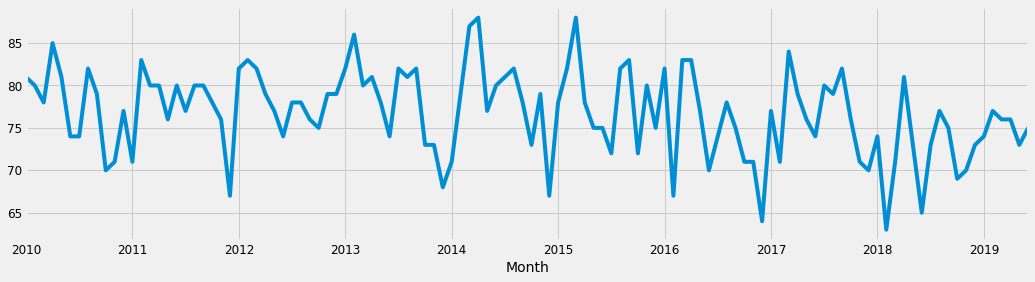

In [35]:
y.plot(figsize=(16, 4))
plt.show()

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: 
* trend
* seasonality
* noise.

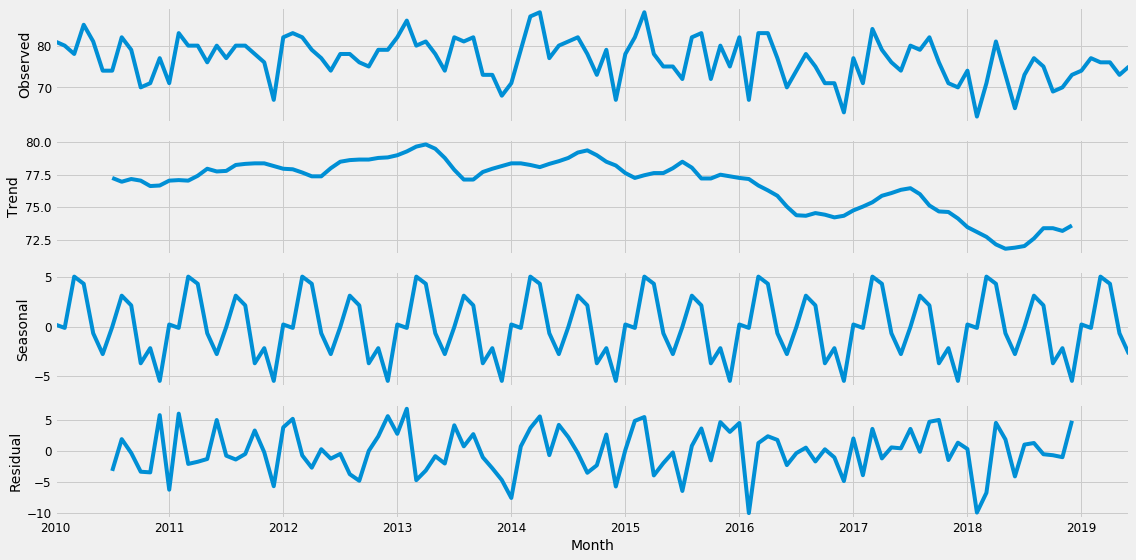

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Notes:

## Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [37]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
period = 12 # change seasonal period
seasonal_pdq = [(x[0], x[1], x[2], period) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [38]:
optimal_result = 10**5
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{}x{}{} - AIC:{}'.format(param, param_seasonal, period, results.aic))
            
            if results.aic < optimal_result:
              optimal_result = results.aic
              optimal_order = param
              optimal_seasonal_order = param_seasonal
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1304.1172207076067
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1066.9054844680722
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:640.1538803458145
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:530.7187008804746
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:649.2303575293712
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:600.521498103643
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:541.0692587667146
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:533.0153113397064
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1161.7318864194176
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:942.1837438608277
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:628.6135625708291
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:521.4013560575168
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:644.1054292953652
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:646.0464999462275
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:537.6555760816904
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:525.4065882334768
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:723.0421697582619
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:634.3655413579698
ARIMA(0,

In [39]:
print('ARIMA{}x{}{} - AIC:{}'.format(optimal_order, optimal_seasonal_order, period, optimal_result))

ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:515.2315315094016


## Fitting the ARIMA model

In [40]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order = optimal_order,
                                seasonal_order = optimal_seasonal_order,
                                enforce_stationarity = False,
                                enforce_invertibility = False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1804      0.127      1.420      0.156      -0.069       0.430
ma.L1         -0.9378      0.067    -13.919      0.000      -1.070      -0.806
ma.S.L12      -0.8031      0.076    -10.498      0.000      -0.953      -0.653
sigma2        18.3626      2.127      8.634      0.000      14.194      22.531


We should always run model diagnostics to investigate any unusual behavior.

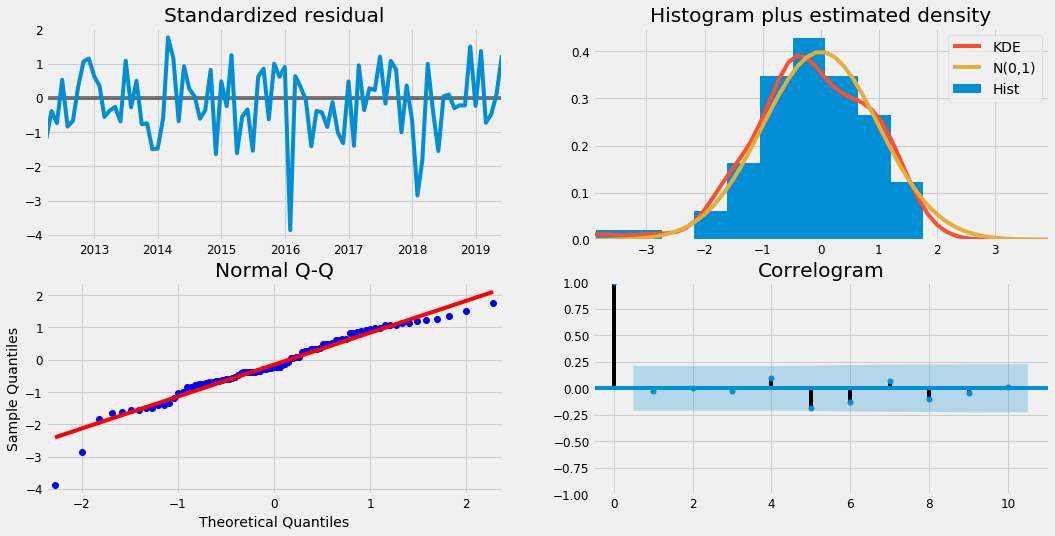

In [41]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Notes:

## Validating forecasts

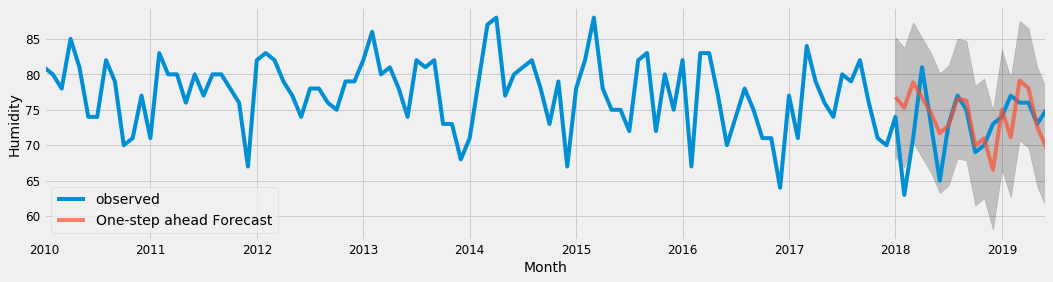

In [42]:
test_start = '2018-01-01' # change the start of test data
pred = results.get_prediction(start=pd.to_datetime(test_start), dynamic=False)
pred_ci = pred.conf_int()

ax = y[train_start:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(16, 4))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel(timestamp)
ax.set_ylabel(weather_aspect)
plt.legend()

plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions.

In [43]:
y_forecasted = pred.predicted_mean
y_truth = y[test_start:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 22.87


In [44]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 4.78


## Producing and visualizing forecasts

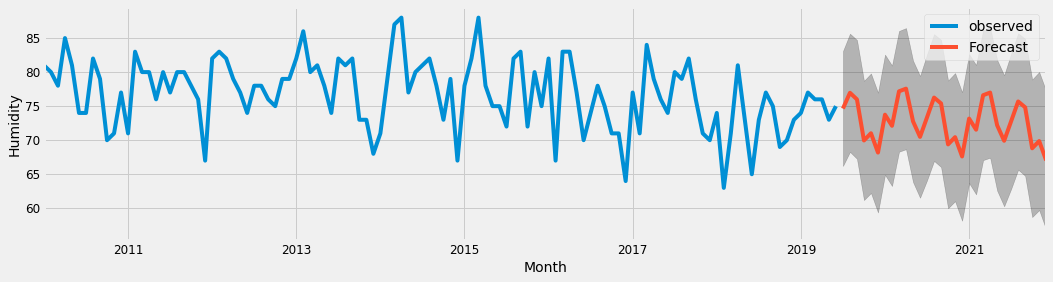

In [45]:
pred_uc = results.get_forecast(steps=30) # change the amount of predicted data
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(16, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel(timestamp)
ax.set_ylabel(weather_aspect)

plt.legend()
plt.show()